In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

#data 가져오기
data = pd.read_csv('https://raw.githubusercontent.com/myungjun-kim-beep/econ2005/master/team-project/2020-1%EC%A1%B0-Stock%20market%20and%20Housing%20market/Raw_data.csv')

#data 정보
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        247 non-null    object 
 1   KOSPI        247 non-null    float64
 2   Price_Seoul  247 non-null    float64
 3   Homeloan     152 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [2]:
#data index 설정(월별)
data = data.set_index('Month')
data.head()

,KOSPI,Price_Seoul,Homeloan
Month,,,
Jan-00,952.53,39.45,NaN
Feb-00,976.05,39.78,NaN
Mar-00,915.94,40.11,NaN
Apr-00,870.17,40.24,NaN
May-00,770.24,40.24,NaN


In [3]:
#data 묘사
data.describe()

,KOSPI,Price_Seoul,Homeloan
count,247.000000,247.000000,152.000000
mean,1574.806235,75.425830,144127.234211
std,567.721944,16.966364,28030.259432
min,547.870000,39.450000,106294.400000
25%,959.945000,60.530000,124702.275000
50%,1815.020000,81.390000,128952.200000
75%,2003.890000,84.755000,170139.925000
max,2533.510000,106.160000,202582.300000


In [4]:
#NaN 제거한 dataset 따로 생성
data_no_missing = data.dropna()
data_no_missing

,KOSPI,Price_Seoul,Homeloan
Month,,,
07-Dec,1903.99,78.64,107469.2
08-Jan,1732.29,79.19,107433.5
08-Feb,1689.53,79.72,106294.4
08-Mar,1651.15,80.87,106393.8
08-Apr,1776.58,82.20,107235.2
...,...,...,...
20-Mar,1786.75,103.91,198287.6
20-Apr,1849.59,104.07,200025.0
20-May,1965.17,104.09,201328.2


In [22]:
data_no_missing.columns

Index(['KOSPI', 'Price_Seoul', 'Homeloan'], dtype='object')

In [5]:
#서울 아파트 가격에 따라 정렬
data_no_missing.sort_values(by = "Price_Seoul")

,KOSPI,Price_Seoul,Homeloan
Month,,,
07-Dec,1903.99,78.64,107469.2
08-Jan,1732.29,79.19,107433.5
08-Feb,1689.53,79.72,106294.4
13-Sep,1984.39,80.52,125556.5
13-Aug,1896.96,80.53,125667.6
...,...,...,...
20-Mar,1786.75,103.91,198287.6
20-Apr,1849.59,104.07,200025.0
20-May,1965.17,104.09,201328.2


In [6]:
#상관계수 구하기
data_no_missing.corr()

,KOSPI,Price_Seoul,Homeloan
KOSPI,1.000000,0.415818,0.678826
Price_Seoul,0.415818,1.000000,0.880687
Homeloan,0.678826,0.880687,1.000000


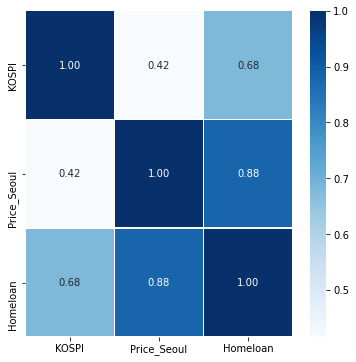

In [8]:
#heatmap을 이용한 시각화
plt.figure(figsize=(6,6))
sns.heatmap(data = data_no_missing.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [11]:
#첫번째 회귀분석 - Homeloan - Price_Seoul
df_1 = data_no_missing[["KOSPI","Homeloan"]]

In [12]:
df_1.head()

,KOSPI,Homeloan
Month,,
07-Dec,1903.99,107469.2
08-Jan,1732.29,107433.5
08-Feb,1689.53,106294.4
08-Mar,1651.15,106393.8
08-Apr,1776.58,107235.2


In [13]:
#회귀분석
res_1 = smf.ols(formula='Homeloan ~ KOSPI', data=df_1).fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeloan   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           7.23e-22
Time:                        20:27:07   Log-Likelihood:                -1724.9
No. Observations:                 152   AIC:                             3454.
Df Residuals:                     150   BIC:                             3460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.316e+04   1.17e+04      1.126      0.2

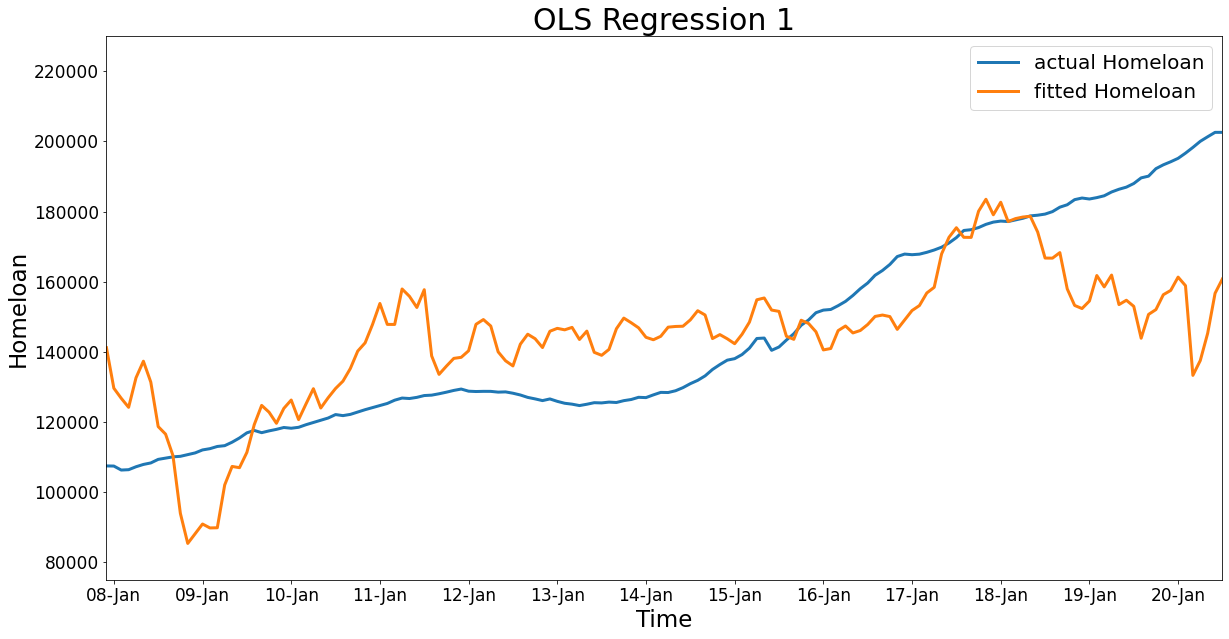

In [57]:
y_predict = res_1.params[0] + res_1.params[1]*df_1['KOSPI']
plt.figure(figsize=(20, 10))
plt.plot(df_1['Homeloan'], linewidth=3, label = 'actual Homeloan')
plt.plot(y_predict,linewidth=3,label = 'fitted Homeloan')
plt.xlim(0,151)
plt.ylim(75000,230000)
plt.xticks(["08-Jan","09-Jan","10-Jan","11-Jan","12-Jan","13-Jan","14-Jan","15-Jan","16-Jan","17-Jan","18-Jan","19-Jan","20-Jan"])

plt.xlabel('Time')
plt.ylabel('Homeloan')
plt.title('OLS Regression 1')
plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [43]:
#두번째 회귀분석 - KOSPI - Price_Seoul
df_2 = data_no_missing[["Homeloan","Price_Seoul"]]

In [44]:
df_2.head()

,Homeloan,Price_Seoul
Month,,
07-Dec,107469.2,78.64
08-Jan,107433.5,79.19
08-Feb,106294.4,79.72
08-Mar,106393.8,80.87
08-Apr,107235.2,82.20


In [45]:
#회귀분석
res_2 = smf.ols(formula='Price_Seoul ~ Homeloan', data=df_2).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     518.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.56e-50
Time:                        20:38:14   Log-Likelihood:                -396.97
No. Observations:                 152   AIC:                             797.9
Df Residuals:                     150   BIC:                             804.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.1945      1.414     39.030      0.0

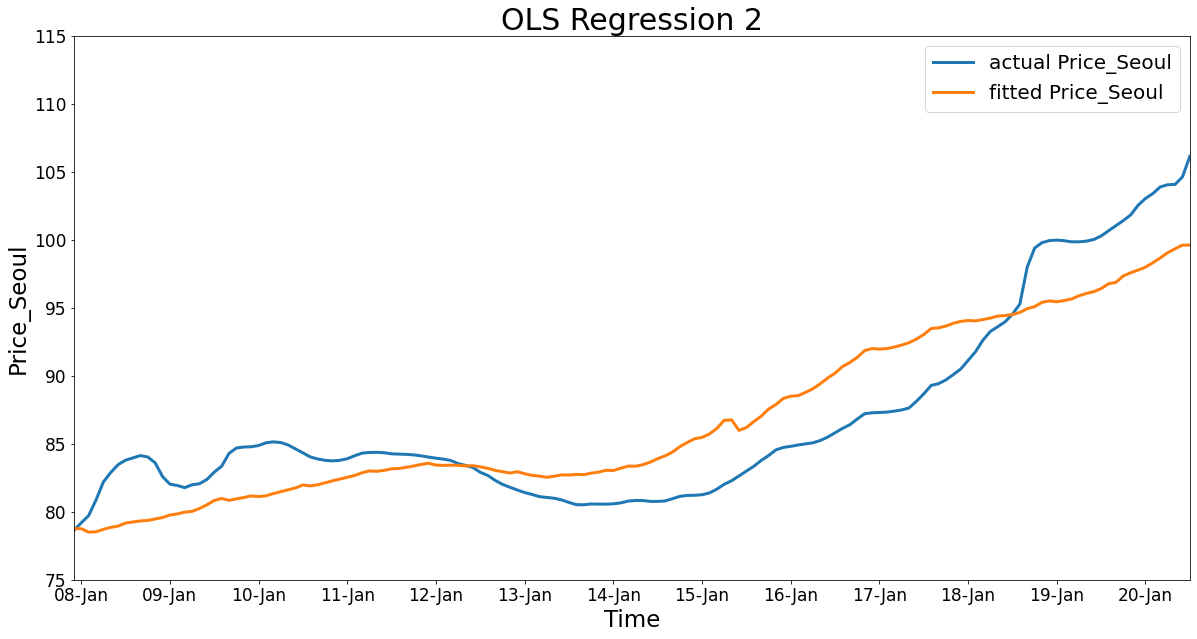

In [48]:
y_predict = res_2.params[0] + res_2.params[1]*df_2['Homeloan']
plt.figure(figsize=(20, 10))
plt.plot(df_2['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,151)
plt.ylim(75,115)
plt.xticks(["08-Jan","09-Jan","10-Jan","11-Jan","12-Jan","13-Jan","14-Jan","15-Jan","16-Jan","17-Jan","18-Jan","19-Jan","20-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 2')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [64]:
#마지막 회귀분석 - KOSPI, Price_Seoul
df_3 = data[["KOSPI","Price_Seoul"]]

In [65]:
df_3.head()

,KOSPI,Price_Seoul
Month,,
Jan-00,952.53,39.45
Feb-00,976.05,39.78
Mar-00,915.94,40.11
Apr-00,870.17,40.24
May-00,770.24,40.24


In [66]:
#회귀분석
res_3 = smf.ols(formula='Price_Seoul ~ KOSPI', data=df_3).fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     975.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           2.15e-87
Time:                        21:02:56   Log-Likelihood:                -850.99
No. Observations:                 247   AIC:                             1706.
Df Residuals:                     245   BIC:                             1713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3512      1.432     23.294      0.0

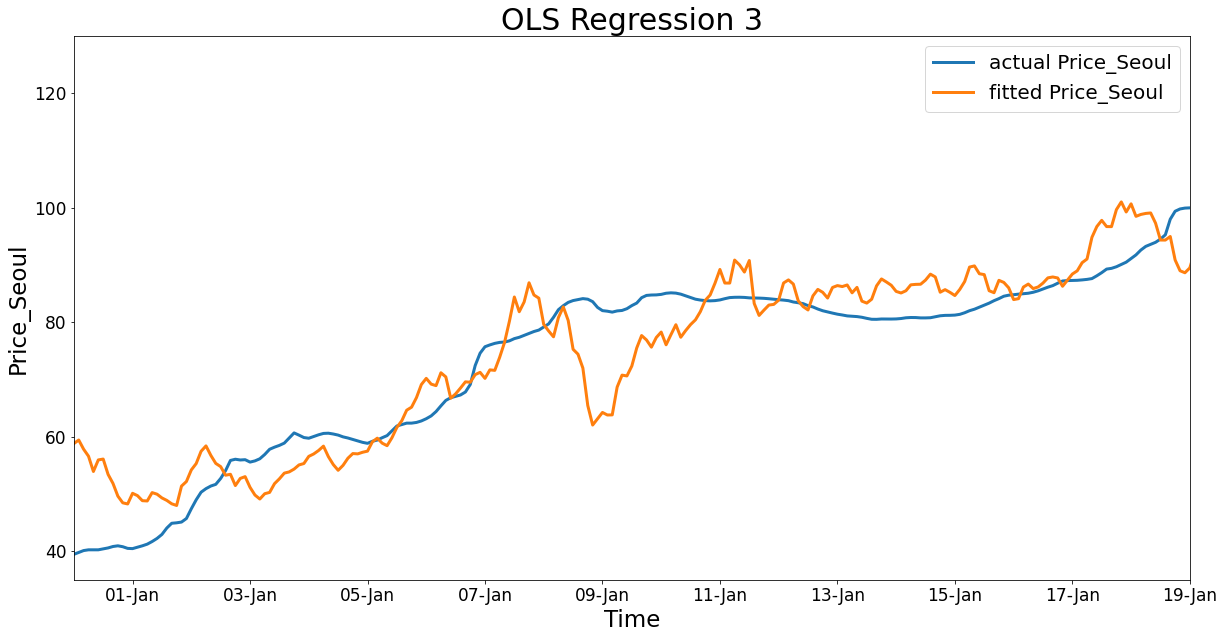

In [76]:
y_predict = res_3.params[0] + res_3.params[1]*df_3['KOSPI']
plt.figure(figsize=(20, 10))
plt.plot(df_3['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,151)
plt.ylim(35,130)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 3')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()